In [1]:
import obspy
from obspy import read
st = read("ACBM.mseed")
print(st)

3 Trace(s) in Stream:
IA.ACBM..HNE | 2023-12-13T23:34:42.000000Z - 2023-12-13T23:39:42.000000Z | 100.0 Hz, 30001 samples
IA.ACBM..HNN | 2023-12-13T23:34:42.000000Z - 2023-12-13T23:39:42.000000Z | 100.0 Hz, 30001 samples
IA.ACBM..HNZ | 2023-12-13T23:34:42.000000Z - 2023-12-13T23:39:42.000000Z | 100.0 Hz, 30001 samples


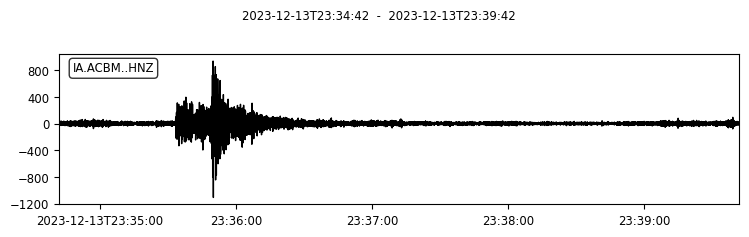

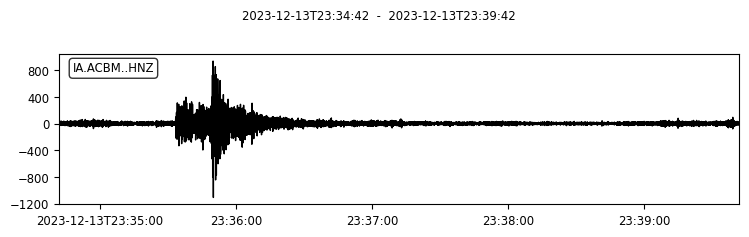

In [2]:
st.select(component="Z").plot()

Sampling rate: 100.0
Number of samples: 30001
Start time: 2023-12-13T23:34:42.000000Z


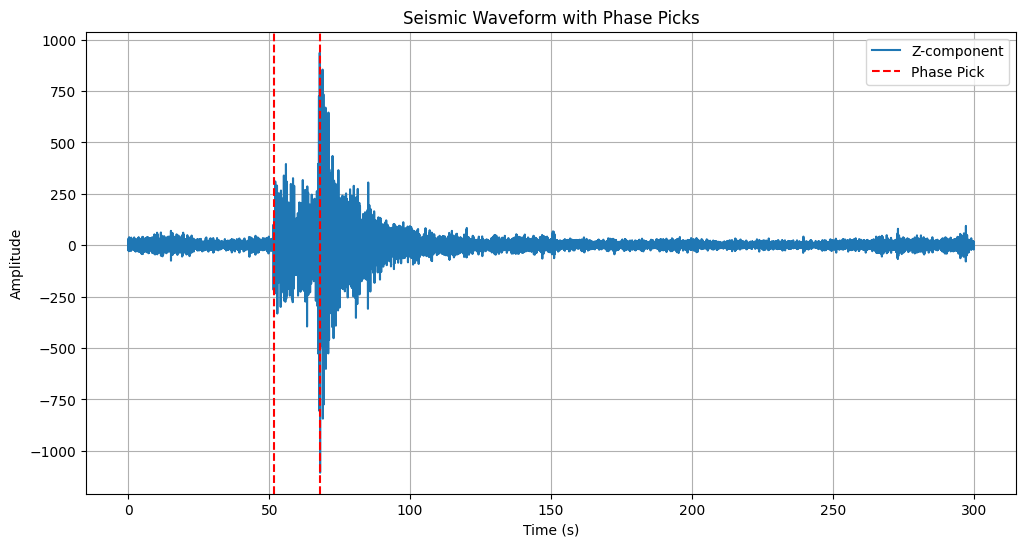

In [17]:
import matplotlib.pyplot as plt
from obspy import read
from obspy.signal.trigger import classic_sta_lta, trigger_onset


st = read("ACBM.mseed")
tr = st.select(component="Z")[0]

print(f"Sampling rate: {tr.stats.sampling_rate}")
print(f"Number of samples: {len(tr.data)}")
print(f"Start time: {tr.stats.starttime}")

# Apply STA/LTA method
cft = classic_sta_lta(tr.data, int(5 * tr.stats.sampling_rate), int(10 * tr.stats.sampling_rate))
onset = trigger_onset(cft, 1.5, 1.5)


onset_times = [start / tr.stats.sampling_rate for start, _ in onset]


plt.figure(figsize=(12, 6))


plt.plot(tr.times(), tr.data, label="Z-component")


for onset_time in onset_times:
    plt.axvline(x=onset_time, color='r', linestyle='--', label='Phase Pick' if 'Phase Pick' not in plt.gca().get_legend_handles_labels()[1] else "")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Seismic Waveform with Phase Picks")
plt.legend()
plt.grid(True)


plt.show()
